# Analyzing the Amazon Prime Video dataset

This project involves analyzing data from Amazon Prime Video to uncover valuable insights. Our focus will be on exploring categories, countries, show types, directors, and ratings within the dataset to gain a deeper understanding of the content available on the platform.

# Importing Libraries:

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv('amazon_prime.csv')

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [36]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [38]:
df.shape

(9668, 12)

In [39]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [40]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [95]:
df.rename(columns={'listed_in':'categories'},inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",United States,No Data Found,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,No Data Found,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",United States,No Data Found,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",United States,No Data Found,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,No Data Found,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",United States,No Data Found,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [103]:
# removing show_id & description

df.drop(['show_id'], axis = 1, inplace = True)
df.drop(['description'], axis = 1, inplace = True)
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"


In [152]:
df.rename(columns={'listed_in':'categories'},inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unavailable,"October 10, 2021",1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,Unavailable,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",Unavailable,"October 10, 2021",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unavailable,"October 10, 2021",2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,Unavailable,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Unavailable,"October 10, 2021",2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [135]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [136]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
categories      0
description     0
dtype: int64

In [137]:
df.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7928
country           87
date_added        84
release_year     100
rating            24
duration         219
categories       518
description     9414
dtype: int64

In [138]:
df.duplicated().sum()

0

In [139]:
df=df.dropna()
df.shape

(9668, 12)

In [140]:
df.type.value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [141]:
df.type.value_counts(normalize=True)

type
Movie      0.808233
TV Show    0.191767
Name: proportion, dtype: float64

In [142]:
df.loc[:, 'country'] = df['country'].fillna(df['country'].mode()[0])
df.loc[:, 'cast'] = df['cast'].fillna('No Data Found')
df.loc[:, 'director'] = df['director'].fillna('No Data Found')
df.loc[:, 'rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.loc[:, 'date_added'] = df['date_added'].fillna('No Data Found')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  categories    9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [144]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
categories      0
description     0
dtype: int64

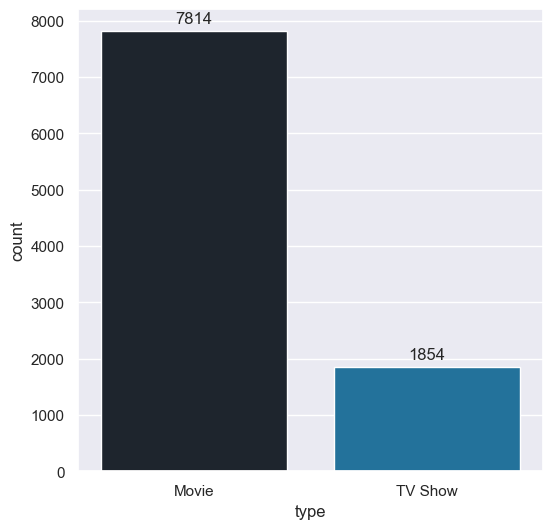

In [145]:
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
cp = sns.countplot(x="type", hue="type", data=df, palette=["#1b2530", "#0f79af"], legend=False)

total = float(len(df))
for p in cp.patches:
    height = p.get_height()
    cp.annotate(format(height, '.0f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

plt.show()

Amazon Prime Video offers a greater selection of movies compared to TV shows.

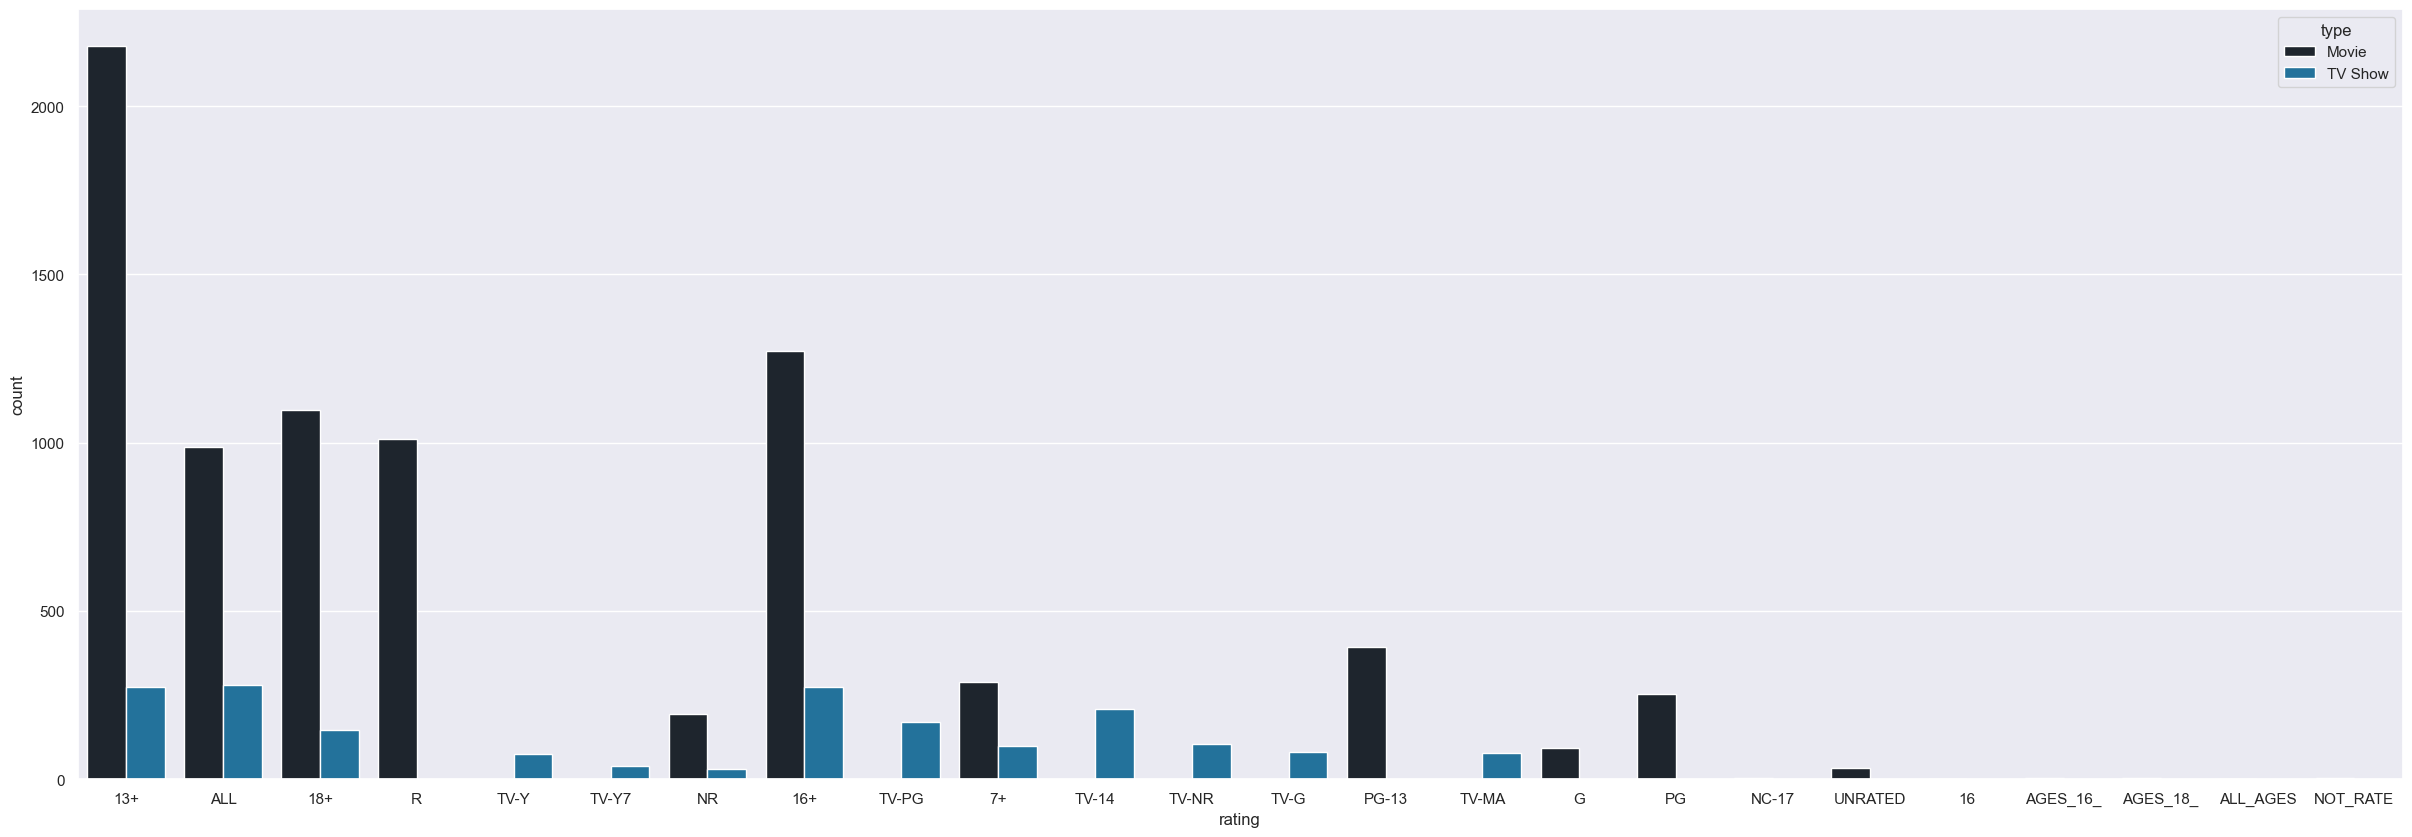

In [146]:
plt.figure(figsize=(30,10))
r = sns.countplot(x= df['rating'],data=df,hue = 'type',palette=["#1b2530", "#0f79af"])

The most frequently added shows on Amazon Prime have a rating of 13+.

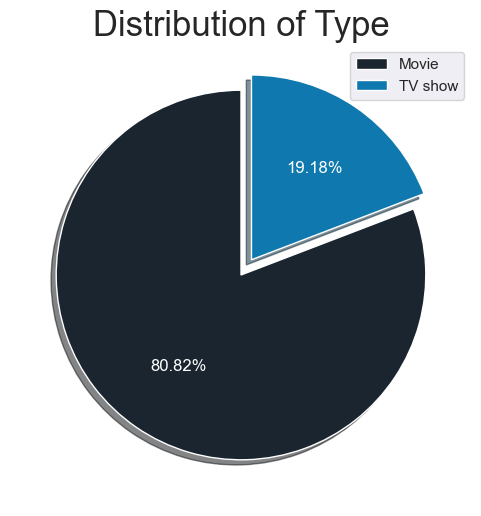

In [147]:
plt.rcParams['figure.figsize'] = (6,6)
ax = plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'color': 'white'})
plt.title('Distribution of Type', fontsize=25)
plt.legend()
plt.show()

The pie chart clearly indicates that Amazon Prime has a higher proportion of movie releases compared to TV shows. Specifically, movies account for approximately 80.82% of the total content, while TV shows represent only about 19.18%.

In [148]:
grouped_data = df.groupby(['date_added', 'type']).size().unstack()

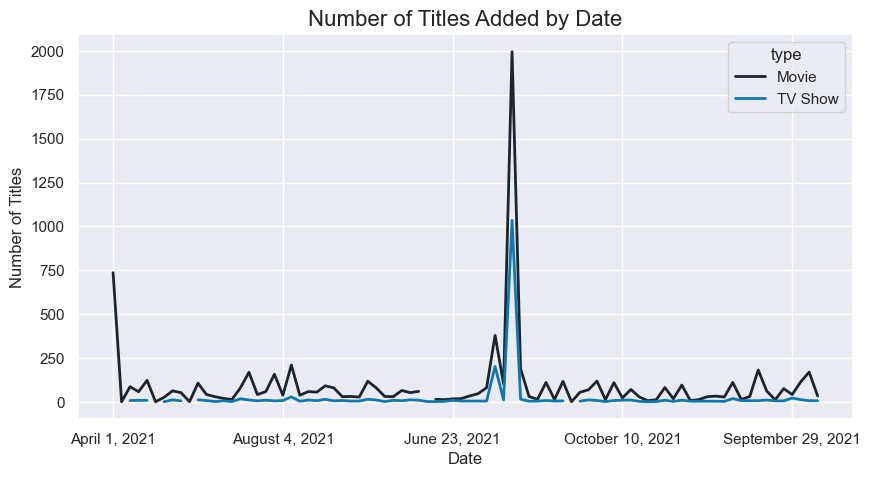

In [149]:
grouped_data.plot(kind='line', figsize=(10, 5), linewidth=2, color=["#1b2530", "#0f79af"])

plt.title('Number of Titles Added by Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.show()

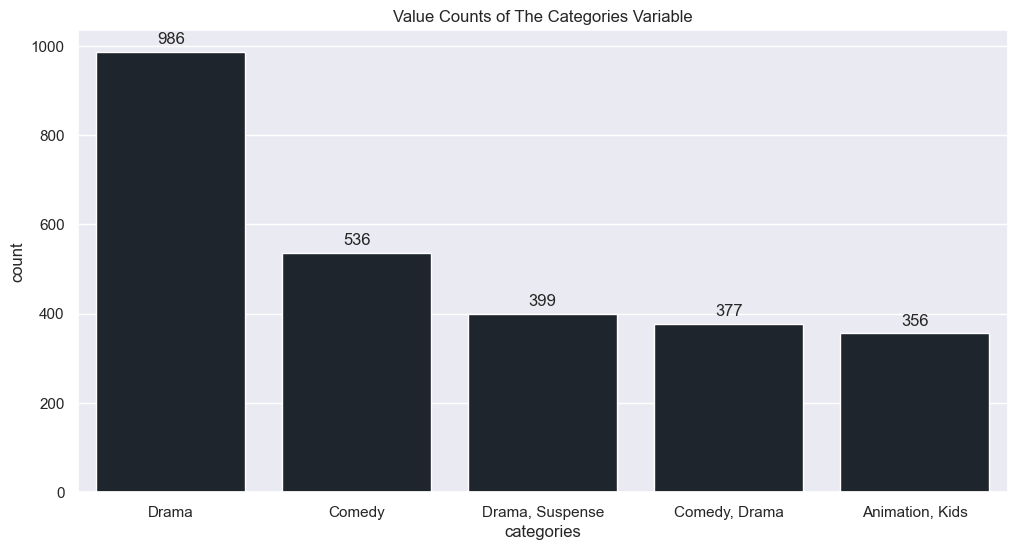

In [171]:
plt.figure(figsize=(12,6))
plt.title("Value Counts of The Categories Variable")
sns.set(style="darkgrid")
ax = sns.countplot(x="categories", hue="categories", data=df, order=df.categories.value_counts().iloc[:5].index, palette=["#1b2530"])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

On Amazon Prime, dramas are the most frequently released category of shows.

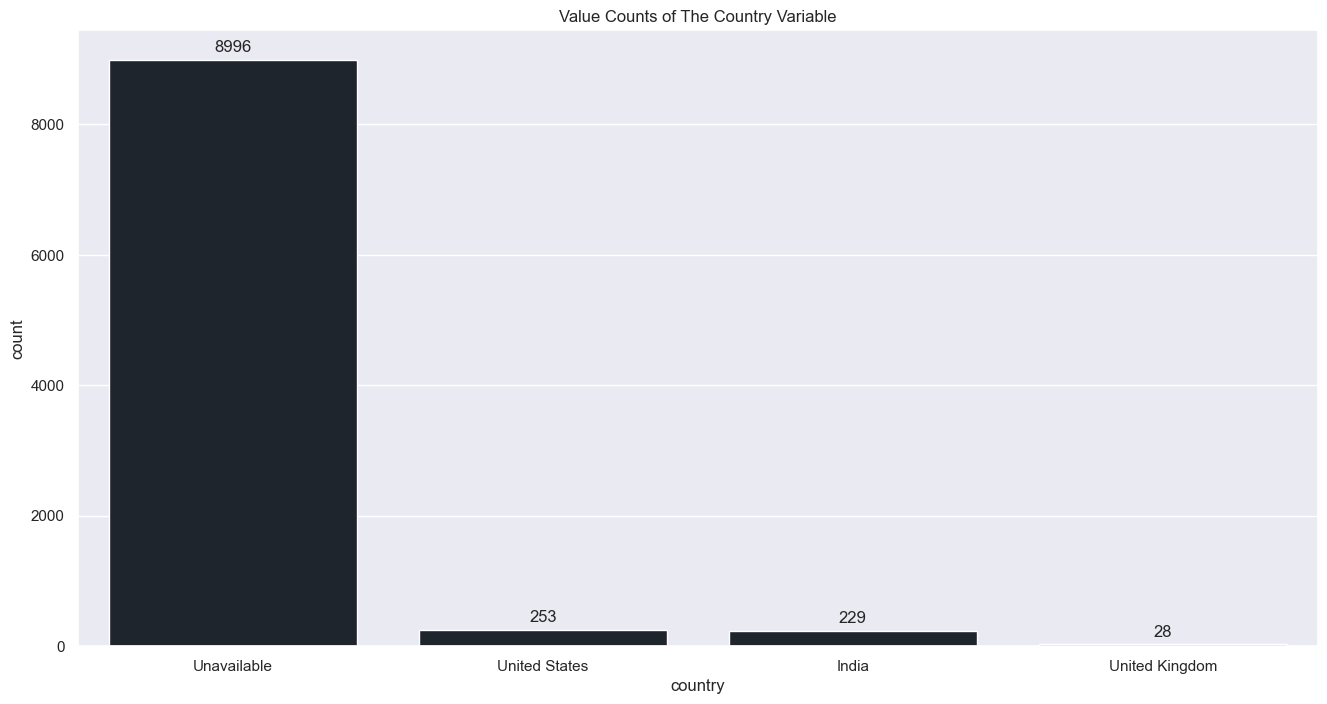

In [180]:
plt.figure(figsize=(16,8))
plt.title("Value Counts of The Country Variable")
sns.set(style="darkgrid")
ax = sns.countplot(x="country", data=df, palette=["#1b2530"], order=df.country.value_counts().iloc[:4].index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

According to the data, the United States, India, and the United Kingdom were the top three countries in terms of releasing the most TV shows and movies on Amazon Prime.

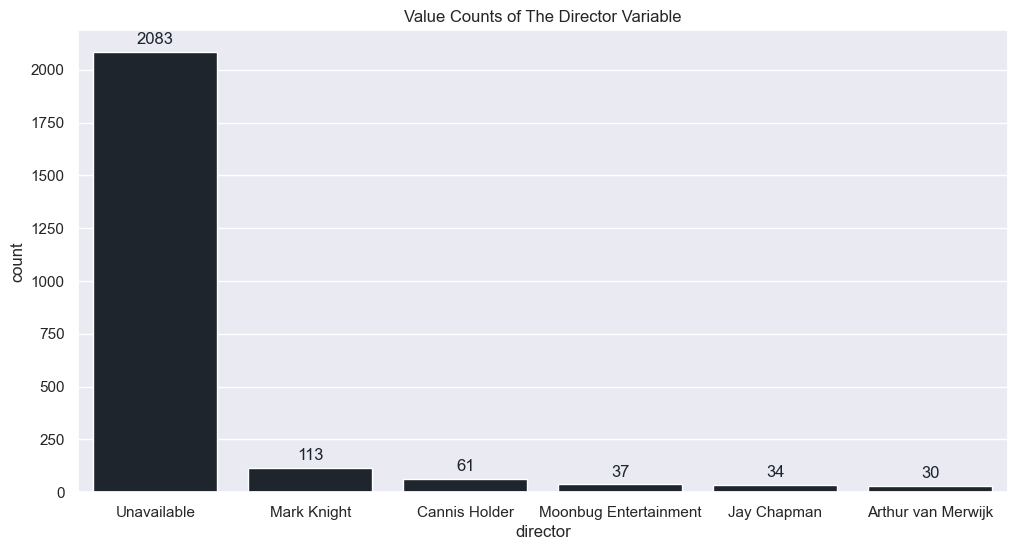

In [183]:
plt.figure(figsize=(12,6))
plt.title("Value Counts of The Director Variable")
sns.set(style="darkgrid")
ax = sns.countplot(x="director", data=df, palette=["#1b2530"], order=df['director'].value_counts().iloc[:6].index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                color='#1b2530')  # Set color to #1b2530
    
plt.show()

Mark Night emerges as the top director in the dataset, credited with the production of 113 shows released on Amazon Prime, making him the most prolific director among the sampled data.

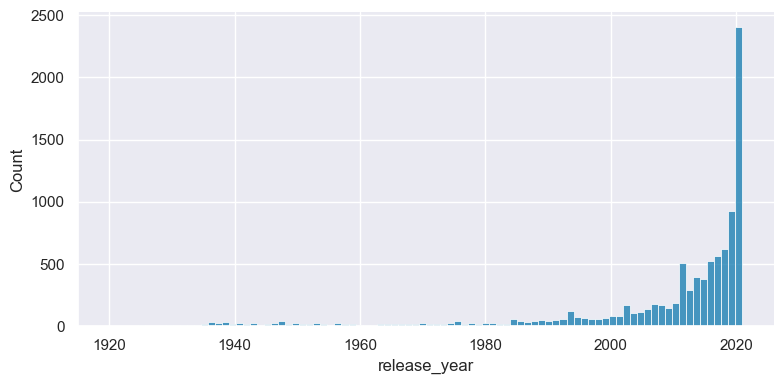

In [184]:
sns.set(style='darkgrid')
ax = sns.displot(data=df, x="release_year", height=4, aspect=2, color="#0f79af")

The shows that were most frequently released on Amazon Prime predominantly belonged to the year 2021.

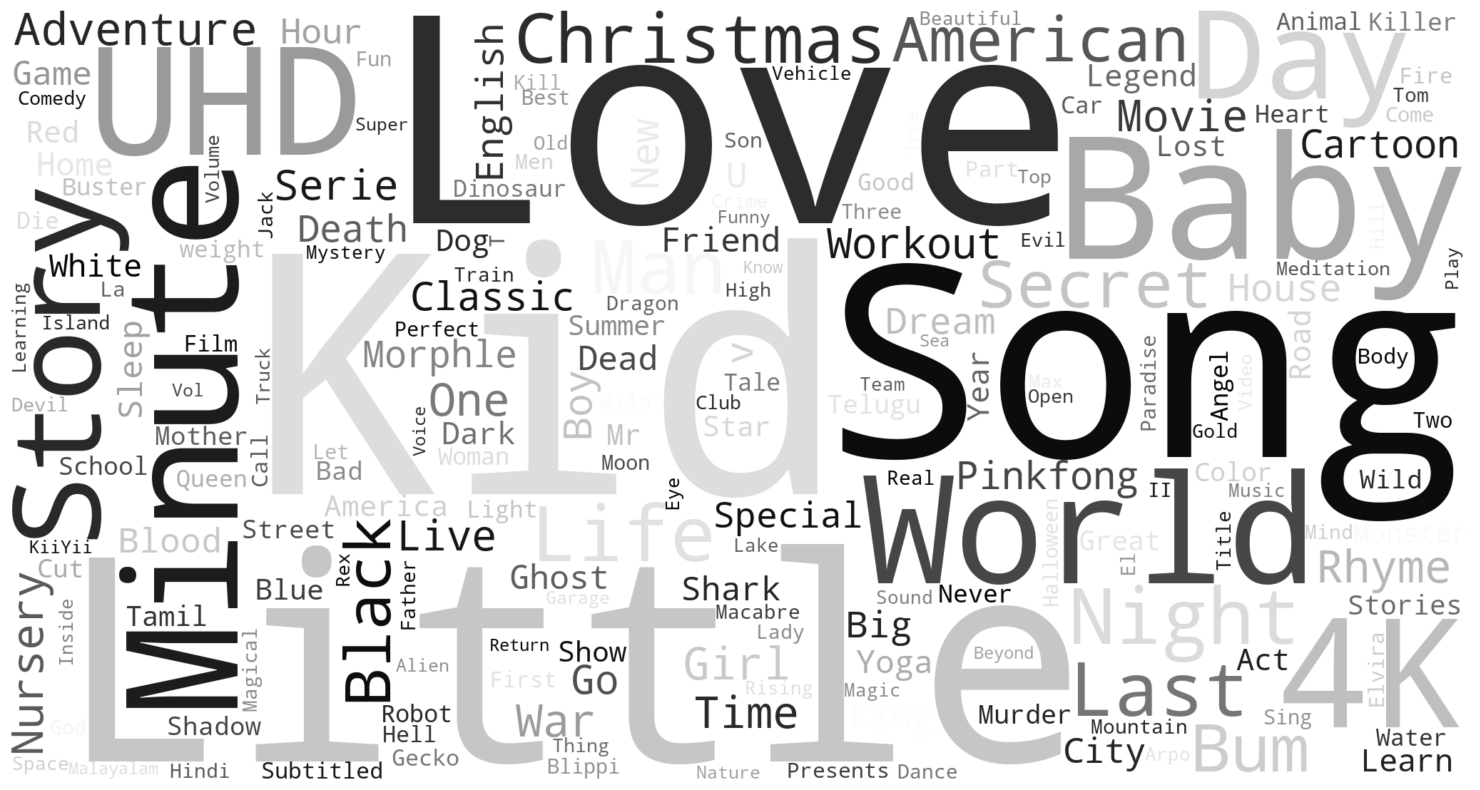

In [185]:
# creating the text variable
txt1 = " ".join(title for title in df.title)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='gist_gray').generate(txt1)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

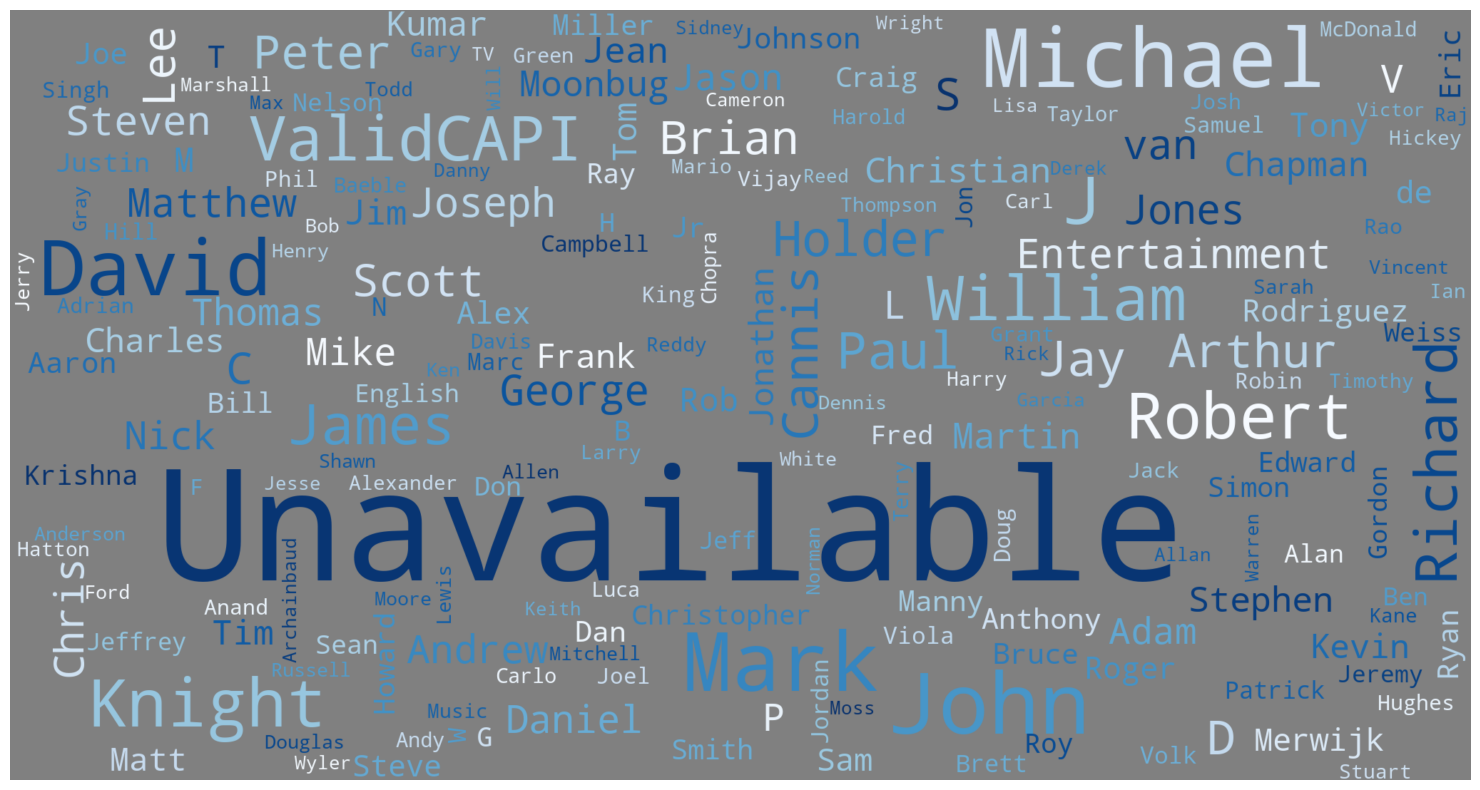

In [186]:
txt2 = " ".join(director for director in df.director)

word_cloud2 = WordCloud(collocations = False, background_color = 'grey',
                        width = 2048, height = 1080,colormap='Blues_r').generate(txt2)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

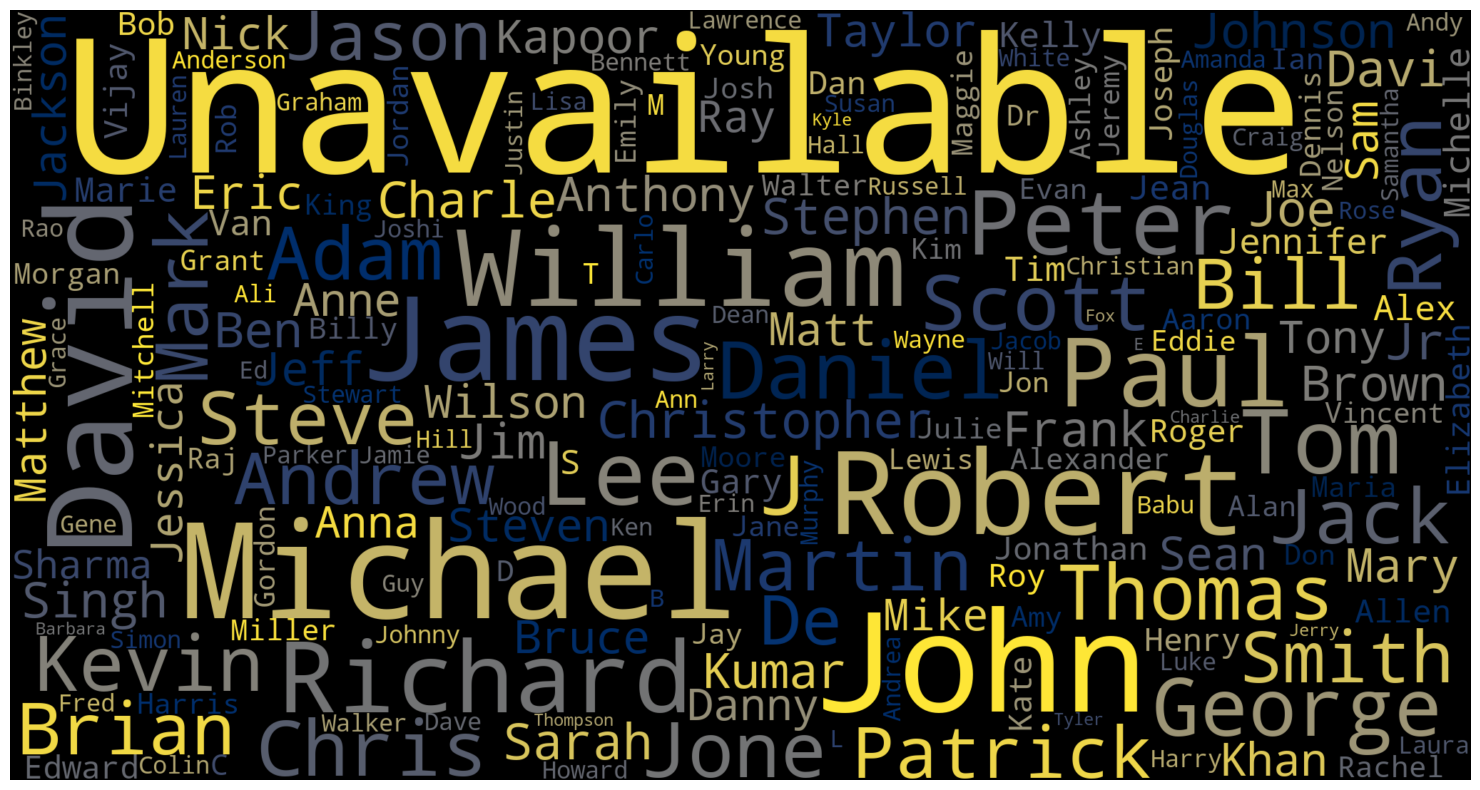

In [188]:
txt3 = " ".join(cast for cast in df.cast)

word_cloud3 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080,colormap='cividis').generate(txt3)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

# The analysis reveals several key findings about the Amazon Prime Video dataset:

- Amazon Prime Video uploads more movie shows than TV shows.
- The majority of shows uploaded on Amazon Prime Video originate from the US.
- Over the last five years, there has been a consistent trend of more movie uploads compared to TV shows.
- Drama emerges as the most uploaded show category on Amazon Prime Video.
- Shows uploaded on Amazon Prime Video are predominantly directed by Mark Knight.
- The most uploaded show rating on Amazon Prime Video falls under the 13+ category in the drama genre.